# <center> Coral Cover Analysis </center>



## Step 1: Import Necessary Libraries

The first step is to import the libraries you'll need. In this case, we're using Pandas to work with data and NumPy (although not used in this specific example). You can import these libraries as follows:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 2: Load Data from a CSV File

To load data from a CSV file into a Pandas DataFrame, you can use the pd.read_table() function. This function is versatile and can handle various file formats. In this example, we'll use it to read data from 'drop_camera_data.csv', a CSV file with a comma (',') separator. Here's how you can do it:

In [22]:
coral_data=pd.read_table('data/drop_camera_data.csv', sep=',', header=0) 
#Important: note the ',' between  (after sep=)
coral_data

,Map class,Class composition,%cover,P gCaCO3m-2yr-1,Overall class area/m2,Component area/m2,Unnamed: 6,P rate,Area check,Unnamed: 9,classes,Unnamed: 11
0,Deep outer reef patches on sand,Live coral,10.0,3000.0,420584.0,4.205840e+04,NaN,,NaN,NaN,3.938769e+06,NaN
1,NaN,Consolidated reef carbonate platform,75.0,3000.0,420584.0,3.154380e+05,NaN,12617.52,NaN,NaN,NaN,NaN
2,NaN,Calcified algae,5.0,3000.0,420584.0,2.102920e+04,NaN,12617.52,NaN,NaN,NaN,NaN
3,NaN,Rubble,10.0,365.0,420584.0,4.205840e+04,NaN,1535.1316,420584,26770.171600,NaN,NaN
4,Forereef coral spur with coralline algae,Live coral,60.0,3000.0,1209428.0,7.256568e+05,NaN,36282.84,NaN,NaN,6.166873e+06,NaN
5,NaN,calcified Algae,5.0,1494.0,1209428.0,6.047140e+04,NaN,18068.85432,NaN,NaN,NaN,NaN
6,NaN,Rubble,10.0,365.0,1209428.0,1.209428e+05,NaN,4414.4122,NaN,NaN,NaN,NaN
7,NaN,Sand,5.0,240.0,1209428.0,6.047140e+04,NaN,2902.6272,NaN,NaN,NaN,NaN
8,NaN,Dead coral,20.0,0.0,1209428.0,2.418856e+05,0.000000e+00,0,1209428,61668.733720,NaN,NaN
9,Algal pavement,Live coral,10.0,3000.0,956196.0,9.561960e+04,2.868588e+06,28685.88,NaN,NaN,4.297145e+06,NaN


'drop_camera_data.csv' should be replaced with the actual filename or the full path to the CSV file you want to read.

sep=',' specifies the separator used in the CSV file. In this case, it's a comma.

header=0 indicates that the first row of the CSV file should be treated as the header containing column names.

Adjust the header parameter as needed if your file doesn't have a header row.

## Step 3: Access and Work with the Data

Once you've loaded the data into the 'coral_data' DataFrame, you can perform various operations on the data, such as data cleaning, analysis, visualization, and more using Pandas functions.

Firstly we clean the data by only extracting the columns from the table that we need:


In [25]:
coral_data = coral_data[["Map class","Class composition","%cover"]]
coral_data

,Map class,Class composition,%cover
0,Deep outer reef patches on sand,Live coral,10.0
1,NaN,Consolidated reef carbonate platform,75.0
2,NaN,Calcified algae,5.0
3,NaN,Rubble,10.0
4,Forereef coral spur with coralline algae,Live coral,60.0
5,NaN,calcified Algae,5.0
6,NaN,Rubble,10.0
7,NaN,Sand,5.0
8,NaN,Dead coral,20.0
9,Algal pavement,Live coral,10.0


## Step 4 : Preprocessing the data

Take the first 48 rows of the 'coral_data' DataFrame and fills any missing values in those rows using the values from the previous row, effectively ensuring that these initial rows have no missing data.

coral_data.head(48): This part of the code uses the .head() method to select the first 48 rows of the 'coral_data' DataFrame. It essentially truncates the DataFrame to include only the first 48 rows. The DataFrame 'coral_data' will now contain only these 48 rows.

.ffill(): After selecting the first 48 rows, the code applies the .ffill() method to fill any missing values (NaN) using forward fill method. This means that if there are missing values in the DataFrame, they will be replaced with the value from the previous row in the DataFrame. This is a common technique for handling missing data in time series or sequential data.


In [32]:
coral_data = coral_data.head(48).ffill()
coral_data

,Map class,Class composition,%cover
0,Deep outer reef patches on sand,Live coral,10.0
1,Deep outer reef patches on sand,Consolidated reef carbonate platform,75.0
2,Deep outer reef patches on sand,Calcified algae,5.0
3,Deep outer reef patches on sand,Rubble,10.0
4,Forereef coral spur with coralline algae,Live coral,60.0
5,Forereef coral spur with coralline algae,calcified Algae,5.0
6,Forereef coral spur with coralline algae,Rubble,10.0
7,Forereef coral spur with coralline algae,Sand,5.0
8,Forereef coral spur with coralline algae,Dead coral,20.0
9,Algal pavement,Live coral,10.0


## Step 5: Searching for Specific Locations

If you want to search for rows with a specific value using iloc, you can achieve this by iterating through the DataFrame and checking each row for the desired value. 

Create a boolean mask where the condition is True for rows where the 'Map class' column matches the target_value. The matching_rows DataFrame will then contain the rows that meet this condition. Finally, it will print those matching rows.

Make sure to replace "Deep outer reef patches on sand" with the specific value you want to search for in the 'Map class' column of your 'coral_data' DataFrame.

Here's how you can do it:

In [35]:
target_value = "Deep outer reef patches on sand"  # Replace with the value you want to search for

# Create a boolean mask to filter rows
mask = (coral_data['Map class'] == target_value)

# Use the boolean mask to extract matching rows
matching_rows = coral_data[mask]

print("Matching rows:")
matching_rows

Matching rows:


,Map class,Class composition,%cover
0,Deep outer reef patches on sand,Live coral,10.0
1,Deep outer reef patches on sand,Consolidated reef carbonate platform,75.0
2,Deep outer reef patches on sand,Calcified algae,5.0
3,Deep outer reef patches on sand,Rubble,10.0


You can achieve the same filtering of rows using the .query() method in Pandas. Here's how you can search for rows in the 'coral_data' DataFrame where the 'Map class' column has a specific value using .query():

Target_value is set to the value you want to search for within the 'Map class' column.
The .query() method is used to filter rows based on a query expression.

In the query expression, backticks ('') are used to enclose the column name with spaces, i.e., Map class.

The @ symbol is used to reference the Python variable target_value within the query expression.

The matching_rows DataFrame will contain the rows that match the specified condition, just as it did in the previous example using boolean indexing. 

This is a more SQL-like approach to querying DataFrames in Pandas.

In [37]:
target_value = "Deep outer reef patches on sand"  # Replace with the value you want to search for

# Use .query() to filter rows
matching_rows = coral_data.query('`Map class` == @target_value')

print("Matching rows:")
matching_rows

Matching rows:


,Map class,Class composition,%cover
0,Deep outer reef patches on sand,Live coral,10.0
1,Deep outer reef patches on sand,Consolidated reef carbonate platform,75.0
2,Deep outer reef patches on sand,Calcified algae,5.0
3,Deep outer reef patches on sand,Rubble,10.0


## Step 6: Visualing the data


Create a bar chart to visualize the composition cover based on the matching_rows DataFrame. You can use the Pandas built-in plotting function for this.

We use .plot(kind="bar") to create a bar chart.
We provide labels for the x and y-axes and set the chart's title.

    composition_cover.plot(kind="bar", legend=False): This line uses the .plot() method to create a bar chart from the composition_cover DataFrame. The kind="bar" parameter specifies the chart type as a bar chart, and legend=False prevents the display of the legend.

    plt.xlabel("Class Composition"): This line sets the label for the x-axis, indicating that it represents "Class Composition."

    plt.ylabel("% Cover"): This line sets the label for the y-axis, indicating that it represents "% Cover."

    plt.title("Composition Cover Distribution for " + target_value): This line adds a title to the bar chart. The title includes the target_value, which helps identify the specific data being represented.

    plt.xticks(rotation=90): This line can be used to rotate the x-axis labels by 90 degrees for better readability when there are long labels. 

Finally, we use plt.show() to display the bar chart.  Here's how you can create a bar chart:

<Figure size 200x200 with 0 Axes>

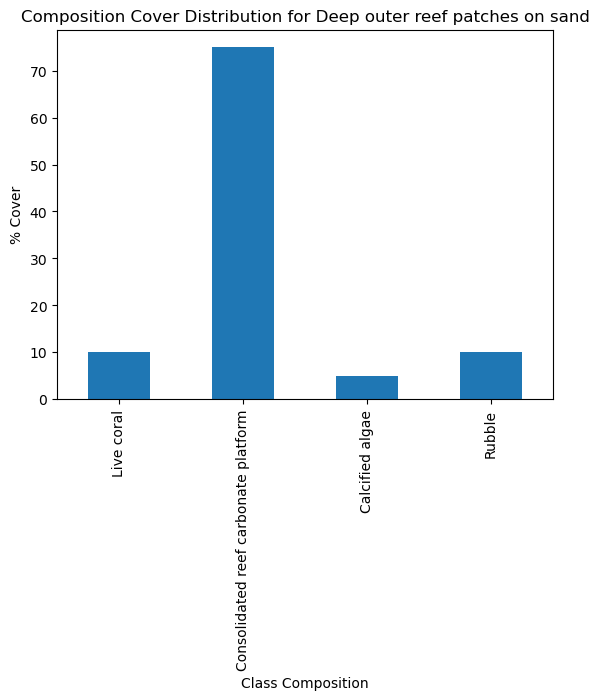

In [43]:
# Extract relevant columns for the bar chart
composition_cover = matching_rows[["Class composition", "%cover"]]

# Set 'Class composition' as the index for better plotting
composition_cover.set_index("Class composition", inplace=True)

# Create a bar chart
plt.figure(figsize=(2, 2))
composition_cover.plot(kind="bar", legend=False)
plt.xlabel("Class Composition")
plt.ylabel("% Cover")
plt.title("Composition Cover Distribution for " + target_value)
plt.xticks(rotation=90)

plt.show()

### Plot in pie chart

Use plt.pie() to create a pie chart. The values are taken from the '%cover' column, and the labels are taken from the 'Class composition' column.

    plt.figure(figsize=(4, 4)): This line specifies the size of the figure in inches, creating a square plot with dimensions 6x6.

    plt.pie(composition_cover['%cover'], labels=composition_cover['Class composition'], autopct='%1.1f%%', startangle=140): In this line, the plt.pie() function is used to create the pie chart. It takes the following arguments:

    composition_cover['%cover']: This provides the values for the pie chart. In this case, it's the '%cover' column from the DataFrame.

    labels=composition_cover['Class composition']: This specifies the labels for each slice of the pie chart, taken from the 'Class composition' column.

    autopct='%1.1f%%': This formats the percentage labels on each slice of the pie chart to show one decimal place.

    startangle=140: The startangle parameter rotates the pie chart counterclockwise. In this case, it starts at an angle of 140 degrees.

    plt.title("Composition Cover Distribution"): This line adds a title to the pie chart.


We set the chart's title and use plt.show() to display the pie chart.

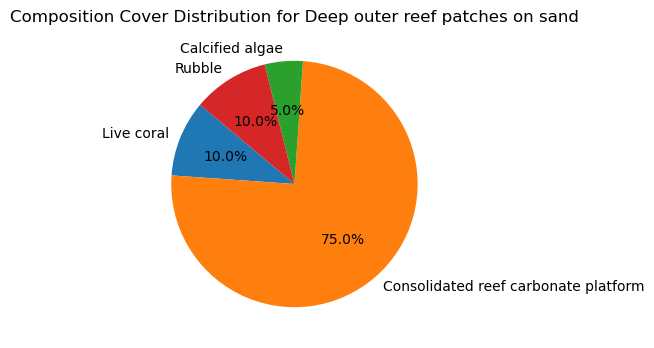

In [45]:
# Extract relevant columns
composition_cover = matching_rows[["Class composition", "%cover"]]

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(composition_cover['%cover'], labels=composition_cover['Class composition'], autopct='%1.1f%%', startangle=140)
plt.title("Composition Cover Distribution for " + target_value)

plt.show()

### Comparing two regions coral cover

Create a subplot with two pie charts, each representing a different 'Map class' from the coral_data DataFrame. 

    fig, axs = plt.subplots(1, 2, figsize=(12, 6)): This line creates a figure with one row and two columns of subplots, allowing you to display two pie charts side by side. 

    The figsize parameter sets the size of the figure.

    axs[0].pie(...): This code creates and plots the first pie chart on the first subplot (axs[0]). It uses data from matching_rows1 and includes labels and a title.

    axs[1].pie(...): This code creates and plots the second pie chart on the second subplot (axs[1]). It uses data from matching_rows2 and also includes labels and a title.
    


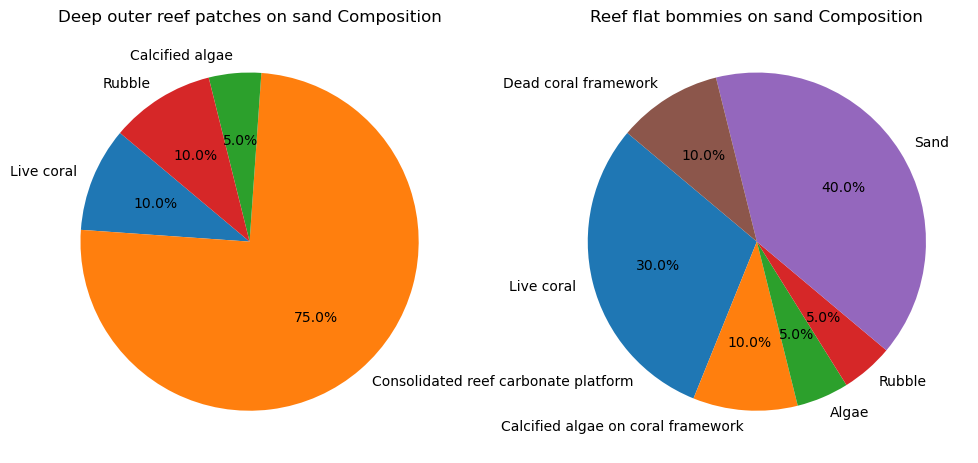

In [47]:

# Define the two target 'Map class' values
target_value1 = "Deep outer reef patches on sand"
target_value2 = "Reef flat bommies on sand"

# Create two DataFrames for each 'Map class'
matching_rows1 = coral_data[coral_data['Map class'] == target_value1]
matching_rows2 = coral_data[coral_data['Map class'] == target_value2]

# Create subplots for the pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart
axs[0].pie(matching_rows1['%cover'], labels=matching_rows1['Class composition'], autopct='%1.1f%%', startangle=140)
axs[0].set_title(f"{target_value1} Composition")

# Plot the second pie chart
axs[1].pie(matching_rows2['%cover'], labels=matching_rows2['Class composition'], autopct='%1.1f%%', startangle=140)
axs[1].set_title(f"{target_value2} Composition")

plt.show()

## Step 7: Comparing all the Location data

We create a bar chart to compare all the locations coral cover in a single plot



Create a grouped chart to separate each of the regions for effective comparison

    We filter the data for the specific 'Map class' within the loop to ensure each set of bars corresponds to a unique 'Map class'.
    
    We calculate the x-positions for bars based on the filtered data's index and add an offset (index) to separate the bars of different 'Map class' values.
    
    We plot the bars with a specified width, alpha for transparency, and label them with the 'Map class'.
    
    We extend the labels and indexes lists to correctly set the x-axis labels.
    
    We set the x-axis labels, xlabel, ylabel, title, and legend.
    
    [:5] is used to narow down only five locations


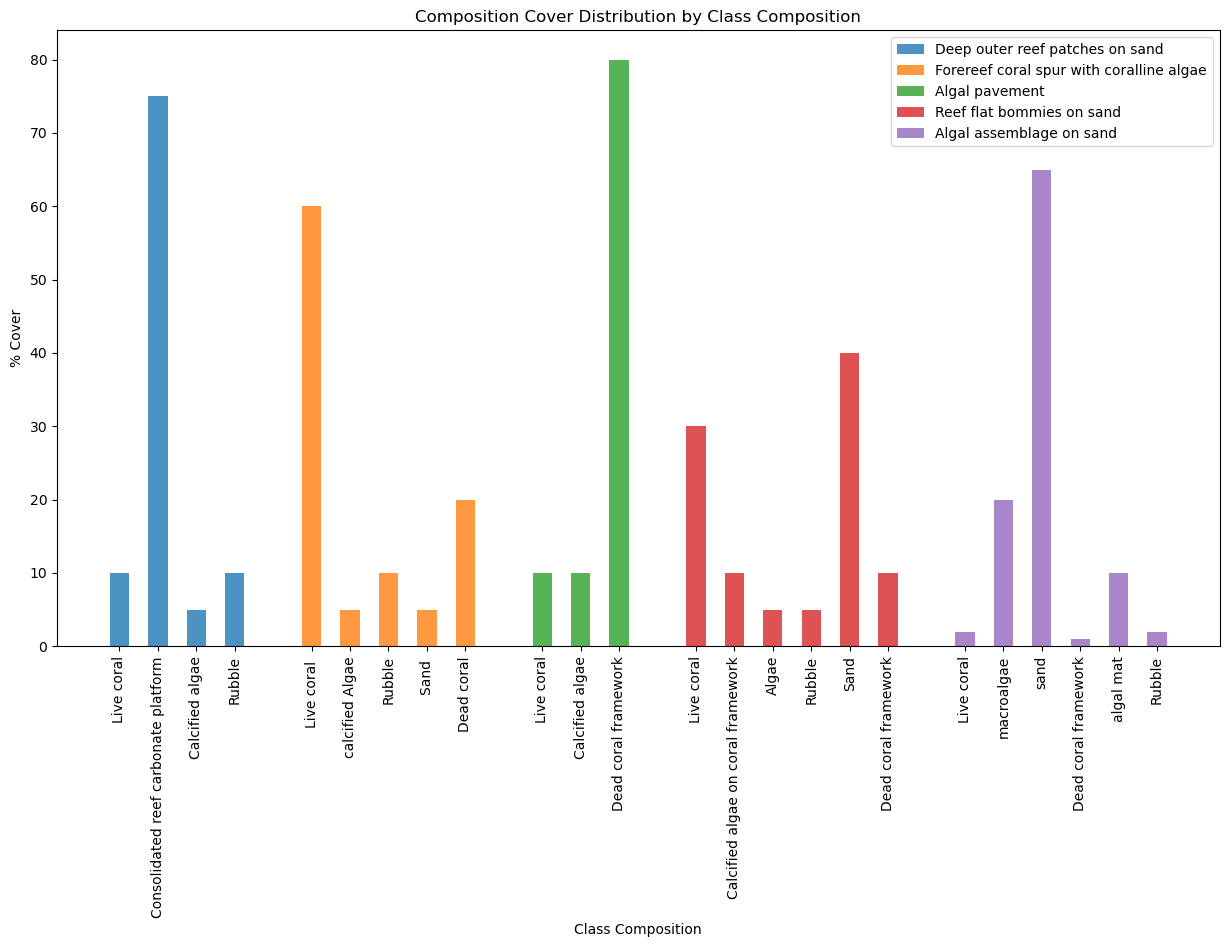

In [49]:
# Get unique 'Map class' values
map_classes = coral_data['Map class'].unique()[:5]

# Define the figure size
plt.figure(figsize=(15, 8))

# Define the width of the bars
width = 0.5

index = 0
indexes = []
labels = []

# Iterate over unique 'Map class' values and plot bars with labels inside
for location in map_classes:
    # Filter data for the specific 'Map class'
    location_data = coral_data[coral_data['Map class'] == location]

    # Calculate x-positions for bars
    x_positions = location_data.index + index

    # Plot the bars
    plt.bar(x_positions, location_data['%cover'], alpha=0.8, width=width, label=location)

    # Extend labels and indexes lists
    labels.extend(location_data['Class composition'])
    indexes.extend(x_positions)
    index += 1

# Set the x-axis labels
plt.xticks(indexes, labels, rotation=90)
plt.xlabel('Class Composition')
plt.ylabel('% Cover')
plt.title('Composition Cover Distribution by Class Composition')
plt.legend(loc='upper right')

### Alternative Graph

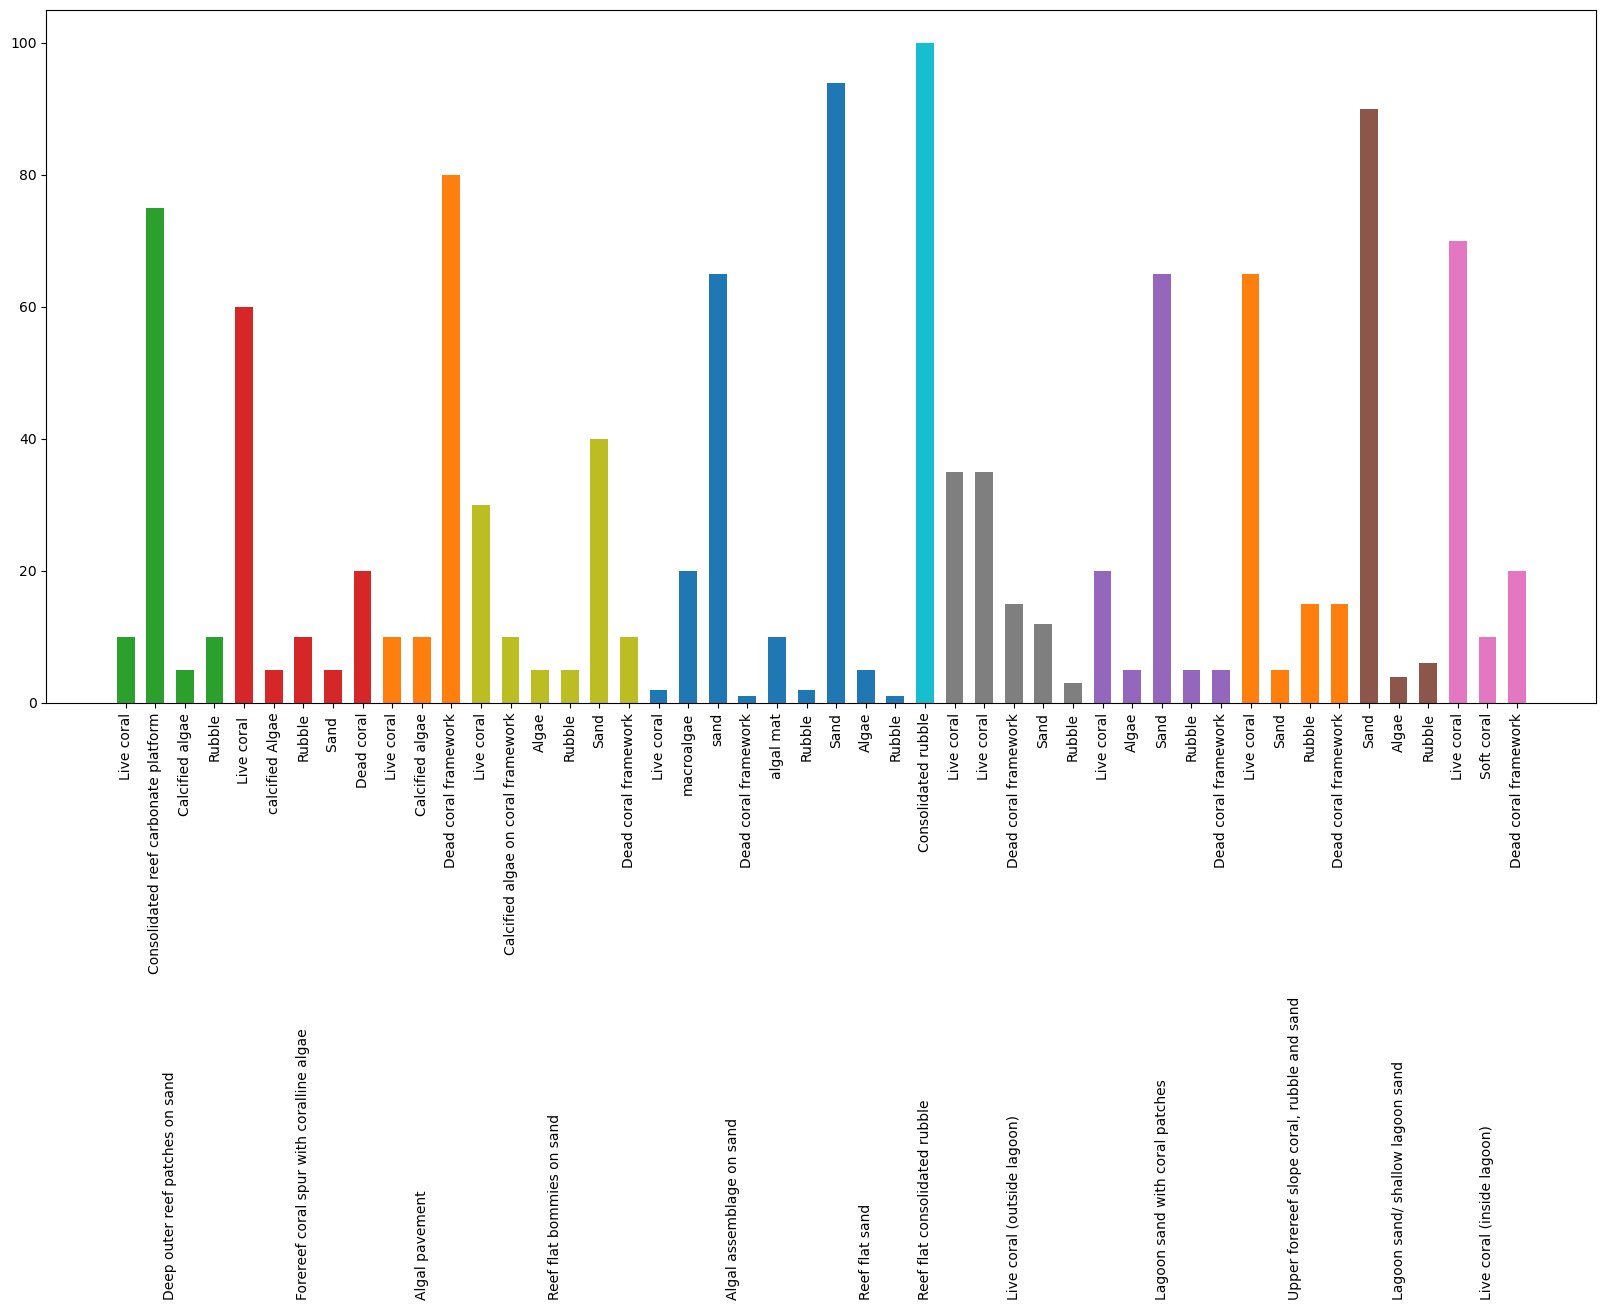

In [51]:
# Define the figure size
plt.figure(figsize=(20, 9))

# Create lists to store bar positions and labels
bar_positions = []
bar_labels = []

# Calculate the width of each group and the space between groups
group_width = 0.6
space_between_groups = 1.0  # Adjust the space between groups as needed

for i, (g, grp) in enumerate(coral_data.groupby('Map class')):
    # Calculate the x-axis positions for the bars within the group
    x = grp.index 
    
    # Plot the bars for the group
    plt.bar(x, grp['%cover'], width=group_width, label=g)
    
    # Calculate the position for the group label (midpoint of the group)
    group_label_x = x.min() + (x.max() - x.min()) / 2
    
    # Add the x-axis positions and labels for the bars
    bar_positions.extend(x)
    bar_labels.extend(grp['Class composition'])
    
    # Add the group label under the group
    plt.text(group_label_x, -90, g, ha='center',rotation=90)

# Set the x-ticks and labels
plt.xticks(bar_positions, bar_labels, rotation=90)

# Add a legend
#plt.legend()

# Show the plot
plt.show()